Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

sns.set(style="whitegrid")

Load Feature-Engineered Data

In [3]:
indicators_df = pd.read_csv("../outputs/county_clusters_2023.csv")
indicators_df = indicators_df.dropna(subset=["BURDEN_PER_1000", "VULNERABLE_PCT", "YOY_CHANGE", "ROLLING_MEAN_3YR"])
print("✅ Features loaded and cleaned")

✅ Features loaded and cleaned


Train Interpretable Model

In [4]:
X = indicators_df[["BURDEN_PER_1000", "VULNERABLE_PCT", "YOY_CHANGE", "ROLLING_MEAN_3YR"]]
y = indicators_df["HOMELESS_COUNT"]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))


print("\n📊 Linear Regression Performance")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")



📊 Linear Regression Performance
R² Score: 0.965
RMSE: 5582.83


Feature Coefficients (Interpretability)

In [5]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\n📌 Model Coefficients")
print(coef_df.sort_values("Coefficient", key=abs, ascending=False))



📌 Model Coefficients
            Feature   Coefficient
0   BURDEN_PER_1000  7.163278e+02
2        YOY_CHANGE -2.200274e+01
3  ROLLING_MEAN_3YR  5.544913e-02
1    VULNERABLE_PCT -5.999460e-11


Analyze Residuals

In [6]:
indicators_df["Predicted"] = y_pred
indicators_df["Residual"] = indicators_df["HOMELESS_COUNT"] - indicators_df["Predicted"]

# Flag top counties with highest errors
threshold = indicators_df["Residual"].abs().quantile(0.95)
outliers = indicators_df[indicators_df["Residual"].abs() > threshold]

print("\n📊 Outliers with Highest Residuals")
print(outliers[["LOCATION_ID", "CALENDAR_YEAR", "HOMELESS_COUNT", "Predicted", "Residual"]])





📊 Outliers with Highest Residuals
    LOCATION_ID  CALENDAR_YEAR  HOMELESS_COUNT     Predicted      Residual
19       CA-502           2024          7445.0  24294.887028 -16849.887028
179      CA-602           2024         10729.0  31302.589205 -20573.589205
180      CA-602           2024          7457.0  24087.188824 -16630.188824


Residual Plot

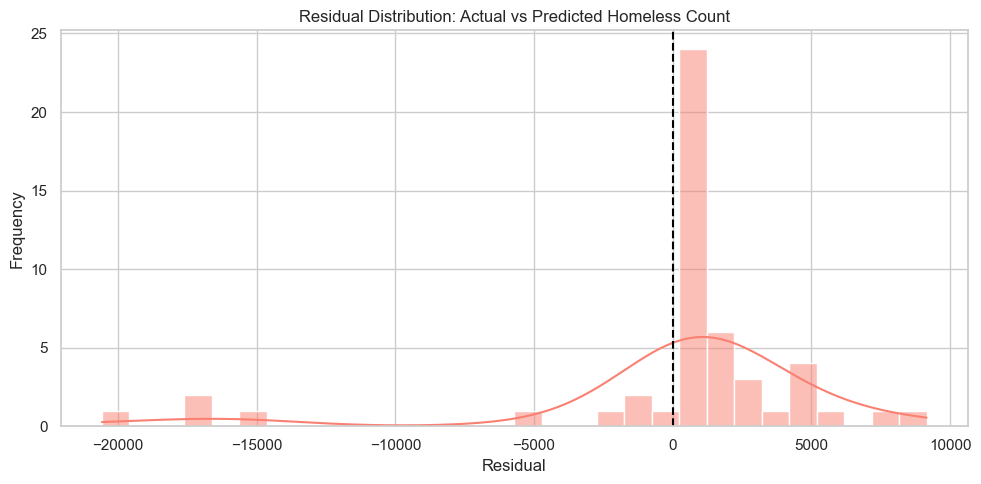

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(indicators_df["Residual"], bins=30, kde=True, color="salmon")
plt.axvline(0, color="black", linestyle="--")
plt.title("Residual Distribution: Actual vs Predicted Homeless Count")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



Save Results

In [8]:
indicators_df.to_csv("../outputs/model_results_with_residuals.csv", index=False)
print("\n📅 Results saved to: ../outputs/model_results_with_residuals.csv")


📅 Results saved to: ../outputs/model_results_with_residuals.csv
